In [ ]:
# On Colab, even with TPU enabled, ResNet50 took a long time.
# Hence, I ran only one Epoch. But I am certain that with better computational power and more Epochs, this model will work well.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential

from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.applications import ResNet50

In [ ]:
!unzip /root/EuroSAT_RGB_Split.zip

Streaming output truncated to the last 5000 lines.
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2927.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2929.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_293.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2934.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2936.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2940.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2942.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2947.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2948.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_295.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2954.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2962.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2965.jpg  
  inflating: EuroSAT_RGB_Split/val/AnnualCrop/AnnualCrop_2971.jpg  

In [ ]:
from PIL import Image

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = image_generator.flow_from_directory('/content/EuroSAT_RGB_Split/train', target_size=(224,224), class_mode='categorical')
test_data = image_generator.flow_from_directory('/content/EuroSAT_RGB_Split/val', target_size=(224,224), class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
sample_training_images, _ = next(train_data)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

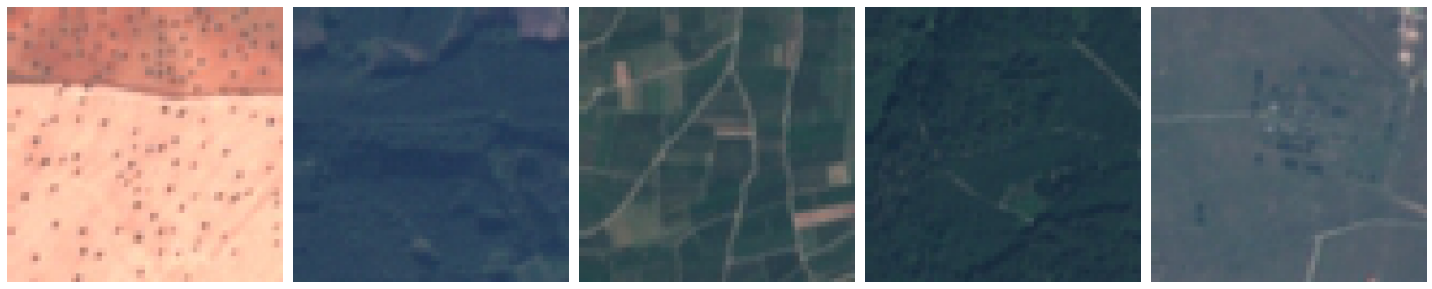

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
print('Training Data: ',train_data[0][0].shape)
print('Test Data: ',test_data[0][0].shape)

Training Data:  (32, 224, 224, 3)
Test Data:  (32, 224, 224, 3)


In [ ]:
train_data[0][0][0].shape

(224, 224, 3)

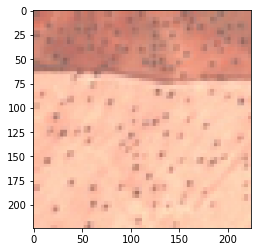

In [ ]:
plt.imshow(train_data[0][0][0])

In [ ]:
resnet_model = ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f9b1d9099b0> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f9b1ca103c8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9b1ca10dd8> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9b1ca10898> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f9b1ca01fd0> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f9b1c923128> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f9b1c8f7e10> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9b1c905240> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f9b1c8adb00> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f9b1c8b4c88> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9b1c8b4470> True
<tensorflow.python.keras.layers.normaliz

In [ ]:
rmodel = models.Sequential()

In [ ]:
rmodel.add(resnet_model)

rmodel.add(layers.Flatten())
rmodel.add(layers.Dense(1024, activation='relu'))
rmodel.add(layers.Dropout(0.5))
rmodel.add(layers.Dense(10, activation='softmax'))

In [ ]:
rmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1025024   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 26,671,986
Trainable params: 26,618,866
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
rmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = rmodel.fit(
          train_data, 
          steps_per_epoch=(train_data.samples/32),
          epochs=1,
          validation_data=test_data,
          validation_steps=(test_data.samples/32))

675/675 [==============================] - 15195s 23s/step - loss: 1.3941 - acc: 0.8623 - val_loss: 3.6418 - val_acc: 0.0000e+00


In [ ]:
# Plotting the Loss and Classification Accuracy
rmodel.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
# Confusion Matrix and Classification report
# creating 
Y_pred = rmodel.predict_generator(test_data, test_data.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential" ,"River", "SeaLake"])
print(df)

In [ ]:
print('Classification Report')
target_names = ['AnnualCrop','Forest', 'HerbaceousVegetation', 'Highway',"Industrial", 'Pasture', 'PermanentCrop','Residential', 'River', 'SeaLake']
classifcn_report = classification_report(test_data.classes, y_pred, target_names=target_names)
print(classifcn_report)

In [ ]:
# Inspired from https://github.com/sachinsharma9780/Near-State-of-the-Art-results-on-classifying-EuroSAT-satellite-images-using-Keras